In [4]:
from galpy.potential import MWPotential2014

print(MWPotential2014[0:2])

[<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x0000012C40E97D00>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x0000012C40E97D30>]


In [5]:
import numpy as np
from astropy.constants import M_sun, G

def density(rho_0, potential, r, vel_disp):
    #print(potential(r,0, quantity=True), potential(0,0, quantity=True))
    #print(potential(r,0,quantity=True)[0] - potential(0,0, quantity=True))
    rho = rho_0 * np.e**((potential(0,0,quantity=True) - potential(r,0,quantity=True)) / (vel_disp)**2)

    index = min(range(len(rho)), key=lambda i: abs(rho[i] - rho_0/2))
    print("core radius" , r[index], "at index:", index, f'(veloctiy dispersion = {vel_disp})')
    #print(rho[index])
    return rho

def rforce(r):
    return G * mass(r) / r**2


def mass(r):
    mass_bulge = milky_way[0].mass(r, ro=8,vo=220, use_physical=False)
    mass_disk = milky_way[1].mass(r, ro=8, vo=220, use_physical=False)
    total_mass = mass_bulge + mass_disk
    return total_mass



[<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x0000012C40E97D00>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x0000012C40E97D30>]


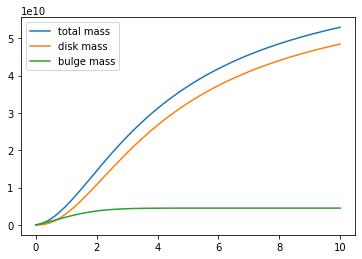

C:\Users\alegb\anaconda3\lib\site-packages\galpy\util\conversion.py:829: UserWarning: Returning output(s) in internal units even though use_physical=True, because ro and/or vo not set
  warnings.warn("Returning output(s) in internal units even though use_physical=True, because ro and/or vo not set")



5.992933749212718e-10

In [6]:
from galpy import potential
import astropy.units as u
import matplotlib.pyplot as plt

milky_way = MWPotential2014[0:2]
print(milky_way)
r_grid = np.linspace(0.001,10,200)*u.kpc

mass_array = []
disk_array = []
bulge_array = []
for r in r_grid:
    mass_bulge = milky_way[0].mass(r,quantity=True, ro=8,vo=220).to(u.M_sun)
    mass_disk = potential.mass(milky_way[1], r, quantity=True, ro=8,vo=220).to(u.M_sun)
    total_mass = potential.mass(milky_way, r, quantity=True, ro=8,vo=220).to(u.M_sun)
    #total_mass = mass_bulge + mass_disk
    #print(mass_disk, mass_bulge, total_mass, r)
    mass_array.append(total_mass.value)
    disk_array.append(mass_disk.value)
    bulge_array.append(mass_bulge.value)


#milky_way[0].mass(r_grid,quantity=True, ro=10,vo=100).to(u.M_sun)
#disk_array2 = potential.mass(milky_way[1], r_grid, quantity=True, ro=10,vo=100).to(u.M_sun)

plt.plot(r_grid, mass_array)
plt.plot(r_grid, disk_array)
plt.plot(r_grid, bulge_array)
#plt.plot(r_grid, disk_array2)
plt.legend(['total mass', 'disk mass', 'bulge mass'])
plt.show()

mass_array = np.array(mass_array)



milky_way[0].dens(1,0)



core radius 0.1581610537380591 kpc at index: 1399 (veloctiy dispersion = 150.0 km / s)


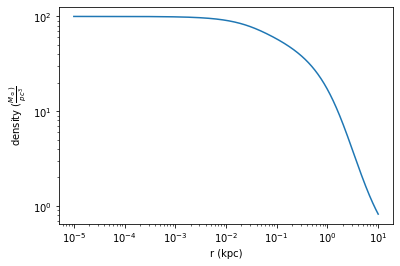

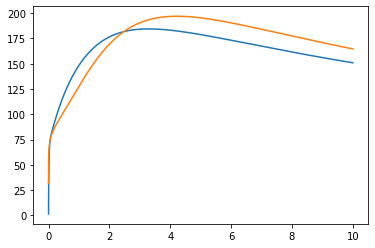

In [4]:
mw_pot = potential.interpSphericalPotential(lambda r: -mass(r) / r**2, np.geomspace(0.01,30,200), Phi0= - 365**2, ro=8, vo=220)
r_grid = np.geomspace(0.00001,10,2000)*u.kpc


#
# for i in range(70,170,3):
#     dens_array = density(100*u.M_sun/(u.pc**3), mw_pot, r_grid, i*u.km/u.s)
#     plt.plot(r_grid, dens_array)

dens_array = density(100*u.M_sun/(u.pc**3), mw_pot, r_grid, 150*u.km/u.s)
plt.plot(r_grid, dens_array)
#dens_array1 = density(1, mw_pot, r_grid,10)


#plt.plot(r_grid, dens_array1)
#print(dens_array)
plt.xlabel('r (kpc)')
plt.ylabel(r'density $(\frac{M_\odot)}{pc^3}$')
plt.loglog()
plt.show()

from galpy.potential import vcirc
plt.plot(r_grid, mw_pot.vcirc(r_grid, quantity=True, ro=8,vo=220))
plt.plot(r_grid, vcirc(MWPotential2014[:2], r_grid, quantity=True, ro=8,vo=220))
#
# def enclosed_mass(r):
#     r_grid = np.linspace(0.0001,r, 200)*u.kpc
#     mass_r = trapezoid(4*np.pi*r_grid**2 * density(1*u.M_sun/(u.pc**3), mw_pot, r_grid, 150*u.km/u.s), r_grid).to(u.M_sun)
#     return mass_r
#
# new_dm_pot = potential.interpSphericalPotential(lambda r: -enclosed_mass(r) / r**2, np.geomspace(0.01,30,200), Phi0= - 365**2, ro=8, vo=220)
# plt.plot(r_grid, new_dm_pot.vcirc(r_grid))

(50, 300)
C:\Users\alegb\anaconda3\lib\site-packages\galpy\potential\PowerSphericalPotentialwCutoff.py:94: RuntimeWarning: invalid value encountered in double_scalars
  out= 2.*numpy.pi*self.rc**(3.-self.alpha)*(1/self.rc*special.gamma(1.-self.alpha/2.)*special.gammainc(1.-self.alpha/2.,(r/self.rc)**2.)-special.gamma(1.5-self.alpha/2.)*special.gammainc(1.5-self.alpha/2.,(r/self.rc)**2.)/r)

-18475.126876516082 km2 / s2 -18475.126876516082 km2 / s2
-18475.126876516082 km2 / s2 -11020.594936500162 km2 / s2
-18475.126876516082 km2 / s2 -9391.349346321522 km2 / s2
-18475.126876516082 km2 / s2 -8039.085853944587 km2 / s2
-18475.126876516082 km2 / s2 -6853.842974010653 km2 / s2
-18475.126876516082 km2 / s2 -5798.24642103619 km2 / s2
-18475.126876516082 km2 / s2 -4849.435025368872 km2 / s2
-18475.126876516082 km2 / s2 -3990.8965710098164 km2 / s2
-18475.126876516082 km2 / s2 -3209.9323745593865 km2 / s2
-18475.126876516082 km2 / s2 -2496.418066930846 km2 / s2
-18475.126876516082 km2 / s2 -184

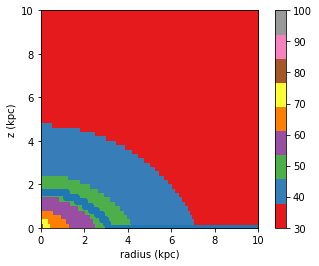

In [5]:
# Non-spherical
milky_way = MWPotential2014[0:2]
vel_disp = 150
z_grid = np.linspace(0,10,50) * u.kpc
r_grid = np.linspace(0,10,300)*u.kpc




def non_sph_density(rho_0, potential, r, z, vel_disp):
    #print(potential(r,0, quantity=True), potential(0,0, quantity=True))
    #print(potential(r,0,quantity=True)[0] - potential(0,0, quantity=True))
    phi_0 = 0
    phi_rz = 0
    for pot in potential:
        phi_0 += pot(0, 0, quantity=True, ro=10, vo=100)
        phi_rz += pot(r, z, quantity=True, ro=10, vo=100)
    print(phi_0, phi_rz)

    rho = rho_0 * np.e**((phi_0 - phi_rz) / (vel_disp)**2)

    #index = min(range(len(rho)), key=lambda i: abs(rho[i] - rho_0/2))
    #print("core radius" , r[index], "at index:", index, f'(veloctiy dispersion = {vel_disp})')
    #print(rho[index])
    return rho

dens = np.empty((len(z_grid), len(r_grid)))
print(np.shape(dens))

rho_0 = 100
x_coords = []
y_coords = []
for i,r in enumerate(r_grid):
    dens_array = np.zeros(len(z_grid))
    for j,z in enumerate(z_grid):
        #print(r)
        #print(z)
        dens[j][i] = non_sph_density(rho_0, milky_way, r, z, 150 * u.km/u.s)

    index = min(range(len(dens)), key=lambda k: abs(dens[k][i] - rho_0/2))
    x_coords.append(r_grid[i].value)
    y_coords.append(z_grid[index].value)
    #print(r_grid[i].value, z_grid[index].value, dens[index][i])




# print(dens)
plt.imshow(dens, cmap='Set1', interpolation='nearest', extent =[r_grid.min().value, r_grid.max().value, z_grid.min().value, z_grid.max().value], origin ='lower')
plt.xlabel("radius (kpc)")
plt.ylabel("z (kpc)")
plt.colorbar()
plt.scatter(x_coords,y_coords)

plt.show()

#dens = density(100)




In [3]:
# Evaluates the SIDM core size, assuming equation (2), and that the baryon distribution follows a herquist profile with a = r_0 = 2.7 kpc, baryon potential(r=0) = - 365^2 km^2/s^2


from scipy.integrate import trapezoid
from galpy.potential import HernquistPotential

def hernquist_dens(r_grid):
    print(i)
    return rho_b0 * r_0**4 / (r_grid *(r_grid + r_0)**3)

def hernquist_mass(r):
    # Returns the mass up to r_grid[-1] according to the hertquist density profile.
    try:
        r_grid = np.linspace(0.1, r.value, 10000000)*u.kpc
    except:
        r_grid = np.linspace(0.1, r, 10000000)*u.kpc
    mass_r = trapezoid(4*np.pi*r_grid**2 * hernquist_dens(r_grid), r_grid).to(u.M_sun)
    return mass_r

# def hernquist_mass(r):
#     # Returns the mass up to r_grid[-1] according to the hertquist density profile.
#     r_grid = np.linspace(0.1, r.value, 1000000)
#     mass_r = trapezoid(4*np.pi*r_grid**2 * hernquist_dens(r_grid*u.kpc).value, r_grid)
#     return mass_r


phi_0 = - 365**2 * u.km**2 / u.s**2
r_0 = 2.7 * u.kpc
rho_b0 = - (phi_0 / (2*np.pi * G * r_0**2)).to(u.M_sun / u.pc**3)
amp = rho_b0 * r_0**3 * 4*np.pi

hp = HernquistPotential(amp=amp, a=r_0, ro=10,vo=100)


r_grid_hq = np.linspace(0.0001,2000,1000000) * u.kpc

plt.plot(r_grid_hq, hernquist_dens(r_grid_hq))
plt.plot(r_grid_hq, hp.dens(r_grid_hq,z=0))
plt.loglog()
plt.show()

plt.plot(r_grid_hq, hp.mass(r_grid_hq))
# mass_array = np.empty(len(r_grid_hq))
# for i,r in enumerate(r_grid_hq):
#     print(r)
#     mass_array[i] = hernquist_mass(r).value
#     print(hernquist_mass(r), 'hi')
# plt.plot(r_grid_hq, mass_array)
r_grid1 = np.linspace(0.1,10000,200)*u.kpc
#plt.plot(r_grid, mass_array)
plt.show()
#mw_pot = potential.interpSphericalPotential(lambda r: -mass(r) / r**2, np.geomspace(0.01,30,200), Phi0=0, ro=10, vo=100)


#print(hernquist_mass(20))

#hern_pot = potential.interpSphericalPotential(lambda r: -hp.mass(r) / r**2, np.geomspace(0.01,30,20), Phi0=0, ro=10, vo=100)

hq_dm_dens = density(25.8*0.02308752, hp, r_grid_hq, 150 * u.km/u.s)
plt.plot(r_grid_hq, hq_dm_dens)
plt.xlabel("radius (kpc)")
plt.ylabel("density (solar mass / pc^3)")
plt.loglog()
plt.show()

circular_velocity = np.sqrt(-phi_0 / 4)
print(circular_velocity)


rc = ((150*u.km/u.s)**2 * np.log(2) / (2 * np.pi * G * rho_b0 * r_0)).to(u.kpc)
print(rc)

#
# plt.plot(r_grid_hq, -hp(r_grid_hq,z=0))
# plt.loglog()
# plt.show()


print(hq_dm_dens[499])
print(r_grid_hq[499])

#
# hq_pot = potential.interpSphericalPotential(lambda r: -hernquist_mass(r) / r**2, np.geomspace(0.01,30,4)*u.kpc, Phi0= - 365**2, ro=8, vo=220)
#
# plt.plot(r_grid_hq, hq_pot.vcirc(r_grid_hq, quantity=True))



NameError: name 'u' is not defined

core radius 0.1581001501001501 kpc at index: 79 (veloctiy dispersion = 150.0 km / s)


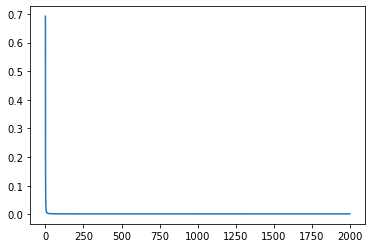

In [7]:
new_mw_dm_dens = density(30*0.02308752, mw_pot, r_grid_hq, 150 * u.km/u.s)
plt.plot(r_grid_hq, new_mw_dm_dens)
plt.show()



11.671058846337045
5.921111111111111
core radius 0.3449335182867003 kpc at index: 11327 (veloctiy dispersion = 150.0 km / s)


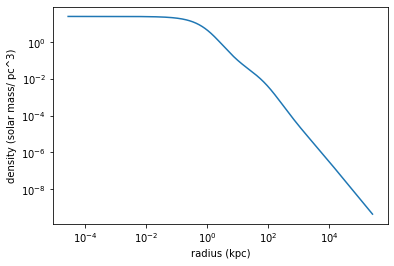

0.9999616296438412 kpc
0.12031419209899999 solMass / pc3


In [8]:
# Spherically symmetric limit where both baryons and dark matter are important

from scipy.integrate import odeint

rho_0 = 0.02308752 * u.M_sun / u.pc**3
rho_0 = 11.5*0.05795574 * u.M_sun / u.pc**3

vel_disp = 150 * u.km/u.s

a0 = (4 * np.pi * G * rho_0 * r_0**2 / vel_disp**2).to('')
a1 = -phi_0 / vel_disp**2

print(a0)
print(a1)

def equations(W,y):
    h = W[0]
    z = W[1]

    dhdy = z
    #dzdy = - (2*y*z + 2*a1/y + a0/((1-y)**4) * np.e**h) / y**2
    dzdy = - (2*z/y + 2*a1/y + a0*np.e**h / ((1-y)**4))
    #print(dhdy, dzdy, h, z, y, np.e**(h+dhdy))
    return [dhdy, dzdy]


W_0 = [0, -a1] #initial conditions

y_grid = np.linspace(0, 1, 100000)[1:-1]

W = odeint(equations, W_0, y_grid)

h_array = W[:,0]

r_grid_sph = -y_grid * r_0 / (y_grid - 1)

rho_grid = rho_0 * np.e**(h_array)
index = min(range(len(rho_grid)), key=lambda i: abs(rho_grid[i] - rho_0/2))
print("core radius" , r_grid_sph[index], "at index:", index, f'(veloctiy dispersion = {vel_disp})')

sph_dm_dens = rho_grid


plt.plot(r_grid_sph, rho_grid*37.9)
#print(rho_grid)
#plt.plot(rho_grid)
plt.xlabel("radius (kpc)")
plt.ylabel("density (solar mass/ pc^3)")
plt.loglog()
plt.show()
# plt.plot(r_grid)
# print(r_grid)
# plt.show()


print(r_grid_sph[27025])
print(rho_grid[27025])







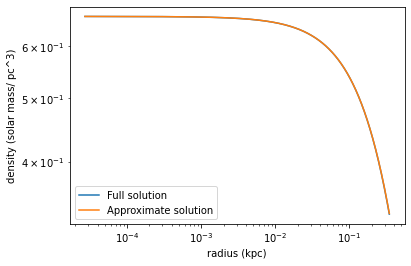

core radius 0.3435605505517918 kpc at index: 11287 (veloctiy dispersion = 150.0 km / s)
0.34354962498491864 kpc


In [9]:
# First approximation of equation (4) [setting third term to a0]

approx_h_array = -a1*y_grid - a0*(y_grid**2)/6
approx_rho_array = rho_0 * np.e**(approx_h_array)

plt.plot(r_grid_sph[:index], approx_rho_array[:index])
plt.plot(r_grid_sph[:index], rho_grid[:index])
plt.legend(["Full solution", "Approximate solution"])
plt.xlabel("radius (kpc)")
plt.ylabel("density (solar mass/ pc^3)")
plt.loglog()
plt.show()

index = min(range(len(approx_rho_array)), key=lambda i: abs(approx_rho_array[i] - rho_0/2))
print("core radius" , r_grid_sph[index], "at index:", index, f'(veloctiy dispersion = {vel_disp})')

# rc from paper

rc = r_0 * ((np.sqrt(1 + (2/3) * np.log(2) * (a0/a1**2)) - 1)  / (1 + (a0 / (3*a1)) - np.sqrt(1 + (2/3) * np.log(2) * (a0/a1**2))) )
print(rc)

69.32 km / (Mpc s) hubble
9.025924346204151e-18 kg / km3 rho_crit
184.35178210960936 kpc r_vir
6.6743e-20 km3 / (kg s2)


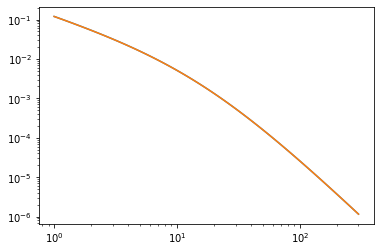

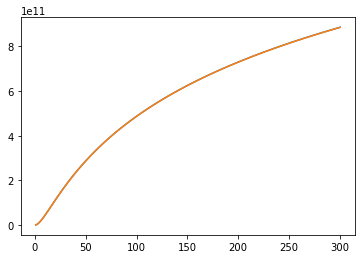

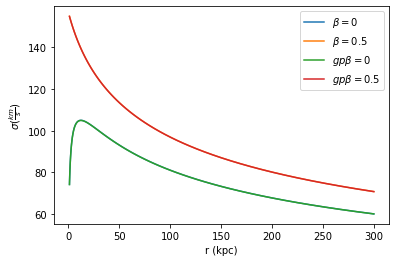

16.511967750062993 (kpc), beta =  0
18.608450210709663 (kpc), beta =  0.5
brentq, beta = 0, 16.51140305208353 beta = 0
brentq, beta = 0.5, 18.602932179278984 beta = 0.5
87528701697.67316 solMass total mass
87472852754.90027 solMass match mass
0.008493422494915985 solMass / pc3 rho_0
13.690046581018573 kpc r0
16.49827634803182 kpc r1


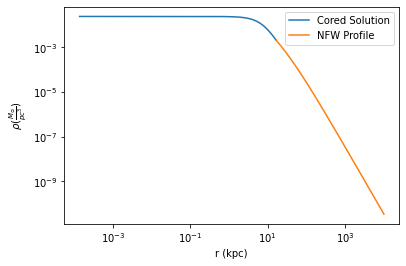

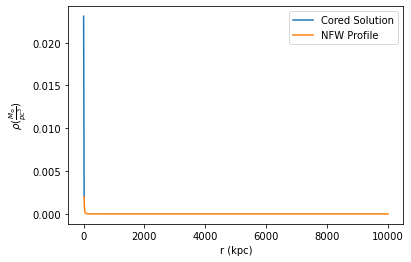

rho_0 = 0.008493422494915985 solMass / pc3 , r_0 = 13.690046581018573 kpc
core radius 6.2981818348063605 kpc 0.008493422494915985 solMass / pc3 0.011538394583548474 solMass / pc3 460


In [10]:
# Assignment 3 model


import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint

# Setting constants
y_0 = 1
r_0 = 1


#calculates density function found in part (a)
def equations(W,x):
    y = W[0]
    z = W[1]

    dydx = z
    dzdx = -(9 * x * (np.e**y) + 2*z) / x
    return [dydx,dzdx]

def singular(r):
    # Returns rho/rho_0 using singular solution
    return 2*r_0**2 / (9 * r**2)

W_0 = [y_0, 0]  # y,dy/dx
x_grid = np.linspace(0.00001, 10, 10000)[:]
W = odeint(equations, W_0, x_grid)

rho_array = math.e**W[:,0] #This is actually rho/rho_0

# y = ln(rho/rho_0) => rho = (e^y)*rho_0


singular_array = singular(x_grid)


import math
from astropy.constants import M_sun, G
from astropy.cosmology import WMAP9 as cosmo
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u


from galpy.df import jeans
from galpy.potential import NFWPotential
from galpy.util import conversion


from scipy.integrate import quad
import time

def f(c):
    return np.log(1+c) - (c / (1+c))

def NFW_encl_m(c, M_vir, r):
    return M_vir * f(c*r/r_vir) / f(c)

def dens_NFW(r):
    rho_0 = (delta_v * rho_crit / 3) * (c**3 / f(c)) # Equation 3.67
    return (rho_0 * r_vir/c) / (r *(1 + (c*r/r_vir))**2)

def potential(R,z):
    r = np.sqrt(R**2.0 + z**2.0)
    rho_0 = (delta_v * rho_crit / 3) * (c**3 / f(c)) # Equation 3.67
    return -4*math.pi*G*rho_0*(r_vir/c)**3 * (np.log(1 + r/(r_vir/c))/r)

# set constants
c = 11.5
M_vir = 7 * 1e11 * M_sun
delta_v = 200
rho_crit = (3 * cosmo.H(0)**2 / (8 * math.pi * G))
rho_crit = rho_crit.to(u.kg/(u.km**3))

r_vir = ((3/(4*math.pi) * M_vir) / (delta_v * rho_crit))**(1/3) # Equation 3.66
print(cosmo.H(0), 'hubble')
print(rho_crit, 'rho_crit')
r_vir = r_vir.to(u.km)

print(r_vir.to(u.kpc), 'r_vir')
G = G.value * u.m**3 /(u.kg * u.s**2)
G = G.to(u.km**3/(u.kg * u.s**2))
print(G)
#rho_crit = rho_crit.value
#r_vir = r_vir.value
#M_vir = M_vir.value
#G = G.value



galpy_pot= NFWPotential(mvir=0.7,conc=c,
                   H=69.2,overdens=200.,wrtcrit=True,
                   ro=10.,vo=220.)

#tests
# print(galpy_pot.mass(1), "galpy")
# print(NFW_encl_m(c,M_vir,1))
#
# print(NFW_encl_m(c,M_vir,1) / galpy_pot.mass(1), 'ratio')
# print(NFW_encl_m(c,M_vir,2) / galpy_pot.mass(2), 'ratio')
#
# print(galpy_pot.dens(1,0))
# print(dens_NFW(1))

def vel_disp(r, beta):
    def integrand(r):
        vals = (r**(2*beta-2) * (dens_NFW(r*u.kpc)).value * NFW_encl_m(c,M_vir,r*u.kpc)).value
        return vals
    integral = quad(integrand, r.value, np.inf)[0] * u.kg**2 * u.kpc**(2*beta-2) * u.km**(-2)
    #print(r**(-2*beta), 'this is r', integral, dens_NFW(r), G)
    vel_dispersion = np.sqrt((G * r**(-2*beta)/dens_NFW(r)) * integral)
    return vel_dispersion

# end = 300 * u.kpc
# end = end.to(u.km)

r_grid = np.logspace(0,2.4773,100)*u.kpc
#print(r_grid[-1], "hi")

dens_list = []
galpy_dens = []

dens_list = dens_NFW(r_grid).to_value(u.M_sun/u.pc**3)
galpy_dens = galpy_pot.dens(r_grid,0,quantity=True).to_value(u.M_sun/u.pc**3)


plt.plot(r_grid, dens_list)
plt.plot(r_grid, galpy_dens)
plt.loglog()
plt.show()

#plt.plot(r_grid, dens_list/galpy_dens)
#plt.show()

mass_list = []
galpy_mass = []

mass_list = NFW_encl_m(c,M_vir,r_grid).to_value(u.M_sun)
galpy_mass = galpy_pot.mass(r_grid,quantity=True).to_value(u.M_sun)

plt.plot(r_grid, mass_list)
plt.plot(r_grid, galpy_mass)
plt.show()


beta_z_sigma_list = []
galpy_beta_z = []
for i in r_grid:
    beta_z_sigma_list.append(vel_disp(i, 0).to_value(u.km/u.s))
    galpy_beta_z.append(jeans.sigmar(galpy_pot, i, beta=0))

beta_five_sigma_list = []
galpy_beta_5 = []
for i in r_grid:
    beta_five_sigma_list.append(vel_disp(i, 0.5).to_value(u.km/u.s))
    galpy_beta_5.append(jeans.sigmar(galpy_pot, i, beta=0.5))


plt.plot(r_grid, beta_z_sigma_list)
plt.plot(r_grid, beta_five_sigma_list)
plt.plot(r_grid, galpy_beta_z)
plt.plot(r_grid, galpy_beta_5)

#plt.loglog()
plt.legend([r"$\beta = 0$", r"$\beta = 0.5$",r"$gp \beta = 0$", r"$gp \beta = 0.5$",])
plt.xlabel('r (kpc)')
plt.ylabel(r'$\sigma (\frac{km}{s})$')
plt.show()


from astropy import units as u
from scipy.optimize import brentq

cross_section = 1 * u.cm**2 /u.g
cross_section = cross_section.to(u.km**2 / u.g)
halo_age = 3.16e17 * u.s

def gamma(sigma, rho, r, beta):
    return cross_section * (4 / np.sqrt(np.pi)) * sigma(r, beta).to(u.km/u.s) * rho(r).to(u.g/u.km**3)

def scatter_rate(r):
    sigma = vel_disp
    rho = dens_NFW
    #print((cross_section * (4 / np.sqrt(np.pi)) * sigma(r*u.kpc, beta).to(u.km/u.s) * rho(r*u.kpc).to(u.g/u.km**3) * halo_age))
    return (cross_section * (4 / np.sqrt(np.pi)) * sigma(r*u.kpc, beta).to(u.km/u.s) * rho(r*u.kpc).to(u.g/u.km**3) * halo_age) - 1


def single_scatter(sigma, rho, r_guess, beta, epsilon):
    i=1
    while True:
        i+=1
        scatter_rate = gamma(sigma, rho, r_guess*u.kpc, beta) * halo_age
        #scatter_rate = scatter_rate.to(u.s**(-1))
        #print(scatter_rate)
        if scatter_rate.value - 1 > epsilon:
            r_guess *= 2 - (-1 + i)/(i)
            #print('high', r_guess, scatter_rate)
        if scatter_rate.value - 1 < -1*epsilon:
            r_guess /= 2 - (-1 + i)/(i)
            #print('low', r_guess, scatter_rate)
        if np.abs(scatter_rate.value - 1) < epsilon:
            #print(scatter_rate,'final scattering rate')
            return r_guess


print(single_scatter(vel_disp, dens_NFW, 20, 0, 0.01), '(kpc), beta = ', 0)
print(single_scatter(vel_disp, dens_NFW, 20, 0.5, 0.001), '(kpc), beta = ', 0.5)

beta = 0
print('brentq, beta = 0,',brentq(scatter_rate, 10, 18), 'beta = 0')
beta = 0.5
print('brentq, beta = 0.5,',brentq(scatter_rate, 10, 20), 'beta = 0.5')



from scipy.integrate import trapezoid


def match_profile(r1):
    M_match = NFW_encl_m(c,M_vir,r1*u.kpc).to(u.M_sun)
    rho_match = dens_NFW(r1*u.kpc).to(u.M_sun / u.pc**3)
    rho_0_guess = 0.008 * u.M_sun / u.pc**3
    while True:
        rho_0_guess *= 1.005
        rho = rho_0_guess*rho_array

        index = min(range(len(rho)), key=lambda i: abs(rho[i]-rho_match))

        r_0 = r1/x_grid[index] * u.kpc
        r_grid = x_grid[:index] * r_0
        rho = rho[:index]
        total_mass = trapezoid(4*math.pi*r_grid**2 * rho, r_grid).to(u.M_sun)
        if total_mass > M_match:
            print(total_mass, 'total mass')
            print(M_match, 'match mass')
            print(rho_0_guess, 'rho_0')
            print(r_0, 'r0')
            print(r_grid[-1], 'r1')

            r2_grid = np.linspace(r_grid[-1].to_value(u.kpc),10000,10000)
            #r2_grid = np.linspace(1,300,10000)

            plt.plot(r_grid, rho.to_value(u.M_sun/u.pc**3))
            plt.plot(r2_grid, dens_NFW(r2_grid * u.kpc).to_value(u.M_sun/u.pc**3))
            plt.legend(['Cored Solution', 'NFW Profile'])
            plt.xlabel('r (kpc)')
            plt.ylabel(r'$\rho (\frac{M_{\odot}}{pc^{3}})$')
            plt.loglog()
            plt.show()


            plt.plot(r_grid, rho.to_value(u.M_sun/u.pc**3))
            plt.plot(r2_grid, dens_NFW(r2_grid * u.kpc).to_value(u.M_sun/u.pc**3))
            plt.legend(['Cored Solution', 'NFW Profile'])
            plt.xlabel('r (kpc)')
            plt.ylabel(r'$\rho (\frac{M_{\odot}}{pc^{3}})$')
            plt.show()

            print('rho_0 =',rho_0_guess, ', r_0 =', r_0)
            index = min(range(len(rho.to_value(u.M_sun/u.pc**3))), key=lambda i: abs(rho.to_value(u.M_sun/u.pc**3)[i] - rho.to_value(u.M_sun/u.pc**3)[0]/2))
            print("core radius", r_grid[index], rho_0_guess, rho[index], index)
            return [rho.to_value(u.M_sun / u.pc ** 3), r_grid, dens_NFW(r2_grid * u.kpc).to_value(u.M_sun / u.pc ** 3), r2_grid]




mw_model = match_profile(single_scatter(vel_disp, dens_NFW, 20, 0, 0.01))



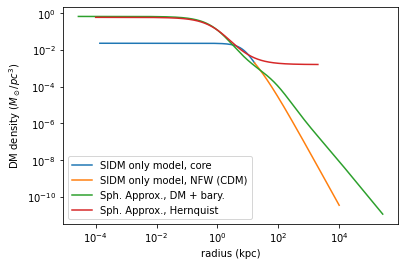

In [11]:
plt.plot(mw_model[1], mw_model[0])
plt.plot(mw_model[3], mw_model[2])
plt.plot(r_grid_sph, rho_grid)
plt.plot(r_grid_hq, hq_dm_dens)
plt.legend(["SIDM only model, core", "SIDM only model, NFW (CDM)", "Sph. Approx., DM + bary.", "Sph. Approx., Hernquist"])

plt.loglog()
plt.plot()
plt.xlabel('radius (kpc)')
plt.ylabel(r'DM density ($M_\odot / pc^3$)')
plt.show()


0.11591148 solMass / pc3
core radius 0.35127034749034747 kpc at index: 13 (veloctiy dispersion = 150.0 km / s) 0.058492213882743 solMass / pc3 0.05795574 solMass / pc3


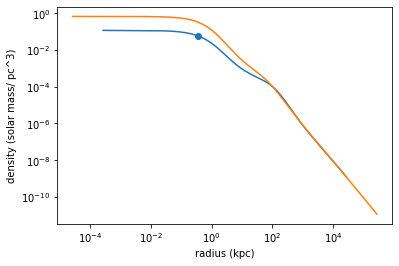

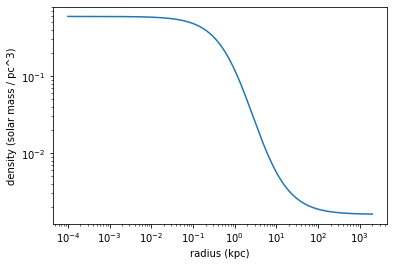

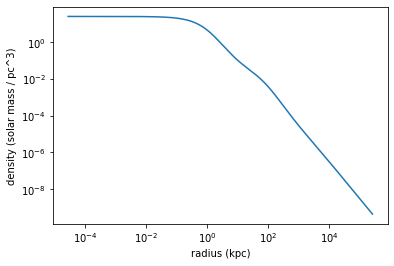

0.35797825164309177 kpc


In [12]:
# Spherical Milky Way model using equation (4) from Kaplinghat
import numpy as np




def sph_milky_way_equations(W, x):
    h = W[0]
    z = W[1]

    dhdx = z
    #print(milky_way_density(y)/rho_0)

    dzdx = -(2*z/x + a0 * (hp.dens(x*r_0,0, quantity=True)/rho_0 + np.e**h))
    return [dhdx, dzdx]

#rho_0 = 0.05 *u.M_sun / u.pc**3 * 40
rho_0 = 2*0.05795574 * u.M_sun / u.pc**3


vel_disp = 150*u.km/u.s
print(rho_0)
r_0 = 2.7 * u.kpc
a0 = (4 * np.pi * G * rho_0 * r_0**2 / vel_disp**2).to('')
W_0 = [0, (-hp.rforce(0.0001,0, quantity=True)/vel_disp**2).to(1/u.kpc) * r_0] #initial conditions


x_grid = np.linspace(0.0001,10000,1000000)

W = odeint(sph_milky_way_equations, W_0, x_grid)


h_array = W[:,0]

r_grid_new = x_grid * r_0

#r_grid_new = -y_grid * r_0 / (y_grid - 1)


rho_grid_2 = rho_0 * np.e**(h_array)
index = min(range(len(rho_grid_2)), key=lambda i: abs(rho_grid_2[i] - rho_0/2))
print("core radius" , r_grid_new[index], "at index:", index, f'(veloctiy dispersion = {vel_disp})', rho_grid_2[index], rho_0/2)


plt.plot(r_grid_new, rho_grid_2)
plt.scatter(r_grid_new[index], rho_grid_2[index])
plt.plot(r_grid_sph, sph_dm_dens)

#print(rho_grid)
#plt.plot(rho_grid)
plt.xlabel("radius (kpc)")
plt.ylabel("density (solar mass/ pc^3)")
plt.loglog()
plt.show()

plt.plot(r_grid_hq, hq_dm_dens)
plt.xlabel("radius (kpc)")
plt.ylabel("density (solar mass / pc^3)")
plt.loglog()
plt.show()

plt.plot(r_grid_sph, 37.9*sph_dm_dens)
plt.xlabel("radius (kpc)")
plt.ylabel("density (solar mass / pc^3)")
plt.loglog()
plt.show()


print(r_0 * np.log(2) / (a1 - np.log(2)))

0.63751314 solMass / pc3
core radius 1.8362718176418178 kpc at index: 68 (veloctiy dispersion = 150.0 km / s) 0.31949347831513314 solMass / pc3 0.31875657 solMass / pc3


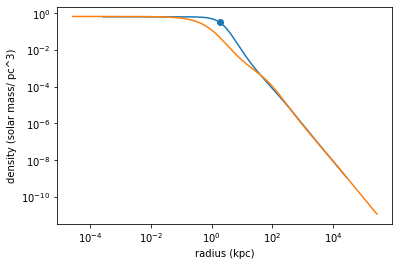

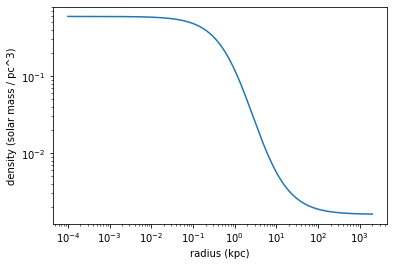

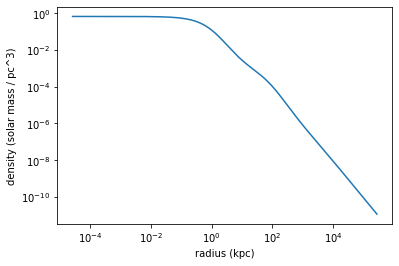

0.35797825164309177 kpc
0.9992709890109891 kpc
0.504038980809771 solMass / pc3


In [49]:
# Spherical Milky Way model using equation (4) from Kaplinghat, using sphericalized MWPotential2014  (rho_grid_3)
import numpy as np


def milky_way_density(y):
    r = -y * r_0 / (y - 1)
    print(mw_pot.dens(r,0, quantity=True))
    return mw_pot.dens(r,0, quantity=True)


def sph_milky_way_equations(W, x):
    h = W[0]
    z = W[1]

    dhdx = z
    #print(mw_pot.dens(x*r_0,0, quantity=True)/rho_0)
    #dzdx = -(2*z/x + a0 * (mw_pot.dens(x*r_0, 0, quantity=True)/rho_0 + np.e**h))
    dzdx = -(2*z/x + a0 * (0 + np.e**h))

    return [dhdx, dzdx]

#rho_0 = 0.05 *u.M_sun / u.pc**3 * 40
rho_0 = 11*0.05795574 * u.M_sun / u.pc**3


vel_disp = 150*u.km/u.s
print(rho_0)
r_0 = 2.7 * u.kpc
a0 = (4 * np.pi * G * rho_0 * r_0**2 / vel_disp**2).to('')
W_0 = [0, -(mw_pot.rforce(0.0001 * r_0,0, quantity=True)/vel_disp**2).to(1/u.kpc) * r_0]


# print(mw_pot.rforce(0.0001,0, quantity=True))
# print((mw_pot.rforce(0.0001 * r_0,0, quantity=True)/vel_disp**2).to(1/u.kpc) * r_0)
# print(a0, a1)


x_grid = np.linspace(0.0001,10000,1000000)

W = odeint(sph_milky_way_equations, W_0, x_grid)


h_array = W[:,0]

r_grid_3 = x_grid * r_0

#r_grid_new = -y_grid * r_0 / (y_grid - 1)


rho_grid_3 = rho_0 * np.e**(h_array)

index = min(range(len(rho_grid_3)), key=lambda i: abs(rho_grid_3[i] - rho_0/2))
print("core radius" , r_grid_3[index], "at index:", index, f'(veloctiy dispersion = {vel_disp})', rho_grid_3[index], rho_0/2)


plt.plot(r_grid_3, rho_grid_3)
plt.scatter(r_grid_3[index], rho_grid_3[index])
plt.plot(r_grid_sph, sph_dm_dens)

#print(rho_grid)
#plt.plot(rho_grid)
plt.xlabel("radius (kpc)")
plt.ylabel("density (solar mass/ pc^3)")
plt.loglog()
plt.show()

plt.plot(r_grid_hq, hq_dm_dens)
plt.xlabel("radius (kpc)")
plt.ylabel("density (solar mass / pc^3)")
plt.loglog()
plt.show()

plt.plot(r_grid_sph, sph_dm_dens)
plt.xlabel("radius (kpc)")
plt.ylabel("density (solar mass / pc^3)")
plt.loglog()
plt.show()



print(r_0 * np.log(2) / (a1 - np.log(2)))  #analytical expression for r_c when a0 is of order 1

print(r_grid_3[37])
print(rho_grid_3[37])

9.990279890109893 kpc


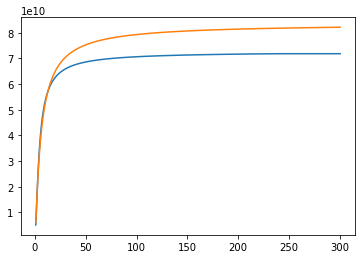

In [14]:
print(r_grid_3[370])


plt.plot(r_grid,mw_pot.mass(r_grid))
plt.plot(r_grid, hp.mass(r_grid))
plt.show()

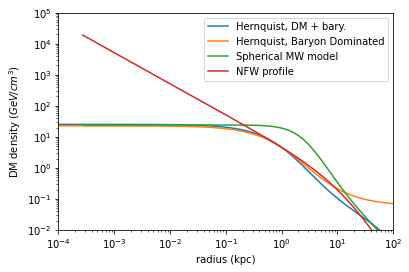

<Figure size 1800x1200 with 0 Axes>

In [47]:
#plt.plot(mw_model[1], mw_model[0]*37.96)
#plt.plot(mw_model[3], mw_model[2]*37.96)
plt.plot(r_grid_sph, rho_grid*37.96)
plt.plot(r_grid_hq, hq_dm_dens*37.96)



#plt.plot(r_grid_new, rho_grid_2) # Spherical Hernquist model (both

plt.plot(r_grid_3, rho_grid_3*37.96) #Spherical MW Model
plt.plot(r_grid_3, MWPotential2014[2].dens(r_grid_3, z=0, quantity=True, ro=8, vo=220)*37.96)



# plt.legend(["SIDM only model, core", "SIDM only model, NFW (CDM)", "Sph. Approx., DM + bary.", "Hernquist, Baryon Dominated", "Spherical MW model", "NFW profile"], loc=1)
plt.legend(["Hernquist, DM + bary.", "Hernquist, Baryon Dominated", "Spherical MW model", "NFW profile"], loc=1)


plt.loglog()
plt.plot()
plt.xlabel('radius (kpc)')
plt.ylabel(r'DM density ($GeV / cm^3$)')
plt.interactive(False)
plt.xlim(right=100, left=10e-5)
plt.ylim(bottom=10e-3)
plt.figure(dpi=300)
plt.show()

In [51]:
import csv

# Create two NumPy arrays
array1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array2 = np.array([[10, 11, 12], [13, 14, 15], [16, 17, 18]])

# Specify the file name for the CSV
csv_filename = "newSIDMonly.csv"

# Combine the arrays vertically
combined_array = np.vstack((r_grid_3.value, rho_grid_3.value))

# Write the combined array to a CSV file
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(combined_array)

print(f"Arrays written to {csv_filename}")

Arrays written to newSIDMonly.csv


[<galpy.potential.DiskSCFPotential.DiskSCFPotential object at 0x0000017B316E5850>, <galpy.potential.SCFPotential.SCFPotential object at 0x0000017B31644C10>]
(50, 50)
C:\Users\alegb\anaconda3\lib\site-packages\galpy\potential\SCFPotential.py:313: RuntimeWarning: overflow encountered in power
  phi[:,:] = - a**l*r**(-l-1.)/ ((1.+a/r)**(2*l + 1.)) * CC[:,:]* (4*numpy.pi)**0.5

1e-09 0.6122448988979591 0.28125532119530017
0.20408163363265305 0.6122448988979591 0.2732593131926669
0.40816326626530613 0.6122448988979591 0.2527230359046693
0.6122448988979591 0.6122448988979591 0.22616992405933994
0.8163265315306122 0.40816326626530613 0.24883696658498156
1.0204081641632654 0.20408163363265305 0.24425404524153604
1.2244897967959183 1e-09 0.21391447164885918
1.4285714294285714 1e-09 0.17887513930161822
1.6326530620612245 1e-09 0.15175899480269864
1.8367346946938776 1e-09 0.13039156089695478
2.0408163273265307 1e-09 0.11328754940274008
2.2448979599591836 1e-09 0.09940381409963907
2.44897959259183

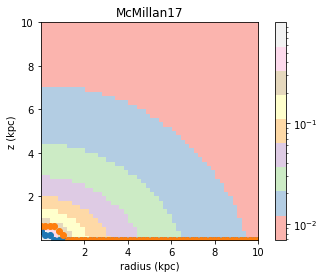

249.1574019302479 km2 / s2 168.32346235096404 km2 / s2
-18225.969474585836 km2 / s2 -18306.80341416512 km2 / s2
249.1574019302479 km2 / s2 7209.3022868504895 km2 / s2
-18225.969474585836 km2 / s2 -11020.594927431775 km2 / s2
249.1574019302479 km2 / s2 8275.095396472143 km2 / s2
-18225.969474585836 km2 / s2 -9391.34933947092 km2 / s2
249.1574019302479 km2 / s2 8962.973963453276 km2 / s2
-18225.969474585836 km2 / s2 -8039.085848146826 km2 / s2
249.1574019302479 km2 / s2 9477.517101665493 km2 / s2
-18225.969474585836 km2 / s2 -6853.842968989264 km2 / s2
249.1574019302479 km2 / s2 9888.586183139636 km2 / s2
-18225.969474585836 km2 / s2 -5798.246416640401 km2 / s2
249.1574019302479 km2 / s2 10229.212923791707 km2 / s2
-18225.969474585836 km2 / s2 -4849.4350214933 km2 / s2
249.1574019302479 km2 / s2 10517.934658168486 km2 / s2
-18225.969474585836 km2 / s2 -3990.896567574724 km2 / s2
249.1574019302479 km2 / s2 10766.368755582967 km2 / s2
-18225.969474585836 km2 / s2 -3209.93237150192 km2 / s2

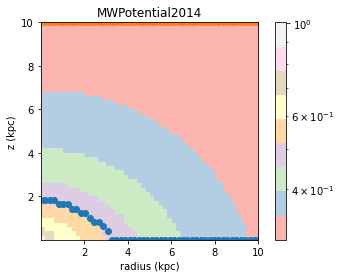

In [128]:
 # Comparing McMillan17 and MWPotential2014 for non-spherical, baryon-dominated case
from galpy.potential.mwpotentials import McMillan17

milky_way = MWPotential2014[0:2]
print(milky_way[0])

milky_way = McMillan17[::2]
print(milky_way)
vel_disp = 150 * u.km/u.s
z_grid1= np.linspace(0.000000001,10,50) * u.kpc
r_grid = np.linspace(0.000000001,10,50)* u.kpc




def non_sph_density(rho_0, potential, r, z, vel_disp):
    #print(potential(r,0, quantity=True), potential(0,0, quantity=True))
    #print(potential(r,0,quantity=True)[0] - potential(0,0, quantity=True))
    phi_0 = 0
    phi_rz = 0
    if potential==McMillan17[::2]:
        for pot in potential:
            phi_0 += pot(0.000000001*u.kpc, 0.00000001*u.kpc, quantity=True)
            phi_rz += pot(r, z, quantity=True)
            #print(phi_0, phi_rz)
    else:
        for pot in potential:
            phi_0 += pot(0.000000001*u.kpc, 0.00000001*u.kpc, quantity=True, ro=10,vo=100)
            phi_rz += pot(r, z, quantity=True, ro=10,vo=100)
            print(phi_0, phi_rz)

    rho = rho_0 * np.e**((phi_0 - phi_rz) / (vel_disp)**2)

    #index = min(range(len(rho)), key=lambda i: abs(rho[i] - rho_0/2))
    #print("core radius" , r[index], "at index:", index, f'(veloctiy dispersion = {vel_disp})')
    #print(rho[index])
    return rho.value

dens = np.empty((len(z_grid1), len(r_grid)))
print(np.shape(dens))

rho_0 = 1 * u.M_sun/u.pc**3
x_coords = []
y_coords = []
x_coords1 = []
y_coords1 = []
for i,r in enumerate(r_grid):
    dens_array = np.zeros(len(z_grid1))
    for j,z in enumerate(z_grid1):
        #print(r)
        #print(z)
        dens[j][i] = non_sph_density(rho_0, milky_way, r, z, 150 * u.km/u.s)

    index = min(range(len(dens)), key=lambda k: abs(dens[k][i] - rho_0.value/2))
    x_coords.append(r_grid[i].value)
    y_coords.append(z_grid1[index].value)
    index = min(range(len(dens)), key=lambda k: abs(dens[k][i] - rho_0.value/4))
    x_coords1.append(r_grid[i].value)
    y_coords1.append(z_grid1[index].value)
    print(r_grid[i].value, z_grid1[index].value, dens[index][i])




# print(dens)
plt.imshow(dens, cmap='Pastel1', interpolation='nearest', extent =[r_grid.min().value, r_grid.max().value, z_grid1.min().value, z_grid1.max().value], origin ='lower', norm=matplotlib.colors.LogNorm())
plt.xlabel("radius (kpc)")
plt.ylabel("z (kpc)")
plt.colorbar()
plt.scatter(x_coords,y_coords)
plt.scatter(x_coords1, y_coords1)
plt.title("McMillan17")
plt.show()

x_coords = []
y_coords = []
x_coords1 = []
y_coords1 = []
milky_way = MWPotential2014[0:2]
for i,r in enumerate(r_grid):
    dens_array = np.zeros(len(z_grid1))
    for j,z in enumerate(z_grid1):
        #print(r)
        #print(z)
        dens[j][i] = non_sph_density(rho_0, milky_way, r, z, 150 * u.km/u.s)

    index = min(range(len(dens)), key=lambda k: abs(dens[k][i] - rho_0.value/2))
    x_coords.append(r_grid[i].value)
    y_coords.append(z_grid1[index].value)
    index = min(range(len(dens)), key=lambda k: abs(dens[k][i] - rho_0.value/4))
    x_coords1.append(r_grid[i].value)
    y_coords1.append(z_grid1[index].value)
    print(r_grid[i].value, z_grid1[index].value, dens[index][i])

plt.imshow(dens, cmap='Pastel1', interpolation='nearest', extent =[r_grid.min().value, r_grid.max().value, z_grid1.min().value, z_grid1.max().value], origin ='lower', norm=matplotlib.colors.LogNorm())
plt.xlabel("radius (kpc)")
plt.ylabel("z (kpc)")
plt.colorbar()
plt.scatter(x_coords,y_coords)
plt.scatter(x_coords1, y_coords1)
plt.title("MWPotential2014")
plt.show()
